# Setup



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gdown --upgrade
%cd /content/drive/MyDrive
!mkdir colab-stylegan2

%cd colab-stylegan2
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

%cd stylegan2-ada-pytorch
!mkdir dataset
!mkdir dataset_final
!mkdir visuelle_ds
!mkdir output
!mkdir pretrained 
!mkdir projected
!mkdir style_mixing
!mkdir generated

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!mkdir test
%cd test
!mkdir projected
!mkdir generated 
!mkdir style_mixing

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!mkdir test_conditional
%cd test_conditional
!mkdir projected
!mkdir generated
!mkdir style_mixing

# Requirements 

In [ ]:
!pip uninstall jax jaxlib -y
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip uninstall torch torchvision -y
!pip install torch==1.8.1 torchvision==0.9.1
!pip install timm==0.4.12 ftfy==6.1.1 ninja==1.10.2 opensimplex
!pip uninstall numpy -y
!pip install numpy==1.21.0
!pip install imageio-ffmpeg

# First test

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch

In [ ]:
!python generate.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/test/generated --trunc=0.7 --seeds=600-605 --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

In [ ]:
!python projector.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/test/projected --target=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/test/generated/seed0600.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

In [ ]:
!python style_mixing.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/test/style_mixing --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

# Dataset preparation
## Upload a .zip of square images to the dataset folder

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds
!unzip /content/drive/MyDrive/styleGanUtils/VISUELLE.zip

# Dataset preparations
- get all images
- print the length of the dataset
- resize all images to 256x256 resolution
- use the dataset_tool script to convert the dataset into a format accepted by the network

In [ ]:
import glob
import os

# PATH = "/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/images"
PATH = "/visuelle_ds/images"

def get_images():
    images = glob.glob(PATH + "/**/*.png", recursive=True)
    print(os.getcwd())
    return images

In [ ]:
images = get_images()
print(f"Length of the dataset: {len(images)}")

In [ ]:
import cv2
from tqdm import tqdm

im_size = 256
images_resized = []

for image in tqdm(images):
    name = image.rsplit('/')[9].rsplit('.')[0]
    img = cv2.imread(image)
    img = cv2.resize(img, (im_size, im_size))
    images_resized.append(img)
    cv2.imwrite('/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/dataset/' 
                + name + '_resized.png', img)

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch

/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch


In [ ]:
!python dataset_tool.py --source /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/dataset --dest /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/dataset_final

## Training the network with transfer learning
- for the first 10 snaps I used the 'ffhq256' pretrained nvidia network 
- for the > snaps i used the custom network checkpoints

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!python train.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output --data=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/dataset_final --gpus=1 --resume=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output/00006-dataset_final-auto1-resumecustom/network-snapshot-000120.pkl --cfg=auto --snap=2 --workers=2

## Project


In [ ]:
!python projector.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/projected --target=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/long_sleeve_resized.png --network=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output/00007-dataset_final-auto1-resumecustom/network-snapshot-000240.pkl

## Style mixing

In [ ]:
!python style_mixing.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/style_mixing --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output/00007-dataset_final-auto1-resumecustom/network-snapshot-000240.pkl

## Generate

In [ ]:
!python generate.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/generated --projected-w=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/projected/projected_w.npz --network=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output/00007-dataset_final-auto1-resumecustom/network-snapshot-000240.pkl

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch

In [ ]:
!python generate.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/generated --seeds=85,265,297,849 --network=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/output/00007-dataset_final-auto1-resumecustom/network-snapshot-000240.pkl

# TEST ON CONDITIONAL DATASET


Create the dictionary containing all the categories that are included in the dataset, loading the train and the test datas

{'capris': 0, 'cloak': 1, 'culottes': 2, 'doll dress': 3, 'drop sleeve': 4, 'gitana skirt': 5, 'kimono dress': 6, 'long cardigan': 7, 'long coat': 8, 'long dress': 9, 'long duster': 10, 'long skirt': 11, 'long sleeve': 12, 'longuette skirt': 13, 'maxi': 14, 'medium cardigan': 15, 'medium coat': 16, 'medium duster': 17, 'midi skirt': 18, 'miniskirt': 19, 'patterned': 20, 'printed': 21, 'sheath dress': 22, 'shirt dress': 23, 'short cardigan': 24, 'short coat': 25, 'short sleeves': 26, 'shorts': 27, 'sleeveless': 28, 'solid colours': 29, 'tracksuit': 30, 'trapeze dress': 31}

Image: PE17/00001.png -> Category: long sleeve


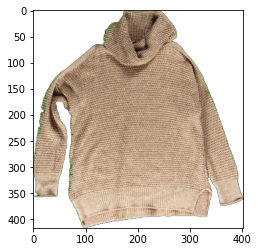

In [ ]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt

## Dictionary of categories 
cat_dict = torch.load("/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/category_labels.pt")

## Pandas dataframe for training 
train_df = pd.read_csv(
    os.path.join("/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/train.csv")
)

## Pandas dataframe for testing 
test_df = pd.read_csv(
    os.path.join("/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/test.csv")
)

print(cat_dict)
print()

## First image with category 
print(f"Image: {train_df.image_path[0]} -> Category: {train_df.category[0]}")

## Showing the image
img = plt.imread("/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/images/" + train_df.image_path[0])
img = plt.imshow(img)
plt.show()

In [ ]:
img_folder = "/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/visuelle_ds/images"

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!mkdir dataset_csv
!mkdir cond_training_output
%cd dataset_csv
!touch training_dataset_csv.csv
!touch testing_dataset_csv.csv
!touch training_dataset.json
!touch testing_dataset.json
!touch train.txt
!touch test.txt

In [ ]:
path_testing_txt = '/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/conditional_dataset_utils/test.txt'
path_training_txt = '/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/conditional_dataset_utils/train.txt'


'''
 {
        "labels": [
            ["00000/img00000000.png",6],
            ["00000/img00000001.png",9],
            ... repeated for every image in the dataset
            ["00049/img00049999.png",1]
        ]
    }
'''

## Subdirectories from dataset_tool.py
k = 0
a = '00000'
b = '00001'
c = '00002'
d = '00003'
e = '00004'
f_ = '00005'

## Test 
with open(path_testing_txt, 'w') as f:
    for i, j in zip(test_df.image_path, test_df.category):

        img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
        number_without_zeros = img_number.lstrip('0')
        true_number = int(number_without_zeros) - 1

        row = '["' + f_ + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
        f.writelines(row)

## Training
with open(path_training_txt, 'w') as f:
    for i, j in zip(train_df.image_path, train_df.category):

        if k in range(0, 1000):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + a + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        if k in range(1000, 2000):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + b + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        if k in range(2000, 3000):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + c + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        if k in range(3000, 4000):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + d + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        if k in range(4000, 5000):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + e + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        if k in range(5000, 5080):
            img_number = i.format().rsplit('/')[1].rsplit('.')[0]

            img_number = i.format().rsplit('/')[1].rsplit('.')[0].zfill(8)
            number_without_zeros = img_number.lstrip('0')
            true_number = int(number_without_zeros) - 1

            row = '["' + f_ + '/' + 'img' + str(true_number).zfill(8) + '.png' + '"' + ',' + str(cat_dict[j]) + '],' + '\n'
            f.writelines(row)

        k += 1


## Train the dataset with labels (conditional GAN)

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!python train.py --resume=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/cond_training_output/00005-final_dataset-cond-auto1-resumecustom/network-snapshot-000100.pkl --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/cond_training_output --data=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/final_dataset --gpus=1  --cond=True --cfg=auto --snap=5 --workers=2

# Test on conditional GAN



In [ ]:
print(f"Classes: {cat_dict}" + '\n' + f"Number of classes: {len(cat_dict)}")

Classes: {'capris': 0, 'cloak': 1, 'culottes': 2, 'doll dress': 3, 'drop sleeve': 4, 'gitana skirt': 5, 'kimono dress': 6, 'long cardigan': 7, 'long coat': 8, 'long dress': 9, 'long duster': 10, 'long skirt': 11, 'long sleeve': 12, 'longuette skirt': 13, 'maxi': 14, 'medium cardigan': 15, 'medium coat': 16, 'medium duster': 17, 'midi skirt': 18, 'miniskirt': 19, 'patterned': 20, 'printed': 21, 'sheath dress': 22, 'shirt dress': 23, 'short cardigan': 24, 'short coat': 25, 'short sleeves': 26, 'shorts': 27, 'sleeveless': 28, 'solid colours': 29, 'tracksuit': 30, 'trapeze dress': 31}
Number of classes: 32


## Generate

In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch
!python generate.py --outdir=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/test_conditional/generated --trunc=1 --seeds=100 --class=10 --network=/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/cond_training_output/00006-final_dataset-cond-auto1-resumecustom/network-snapshot-000000.pkl

## STYLEGAN AS A CLASSIFICATOR


In [ ]:
%cd /content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch

/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch


In [ ]:
import pickle
import torch

## Load the conditional model
file = '/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/cond_training_output/00005-final_dataset-cond-auto1-resumecustom/network-snapshot-000100.pkl'

with open(file, 'rb') as f:
    model = pickle.load(f)

In [ ]:
## Visualize the model
print(model)

{'training_set_kwargs': {'class_name': 'training.dataset.ImageFolderDataset', 'path': '/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/final_dataset', 'use_labels': True, 'max_size': 5577, 'xflip': False, 'resolution': 256}, 'G': Generator(
  (synthesis): SynthesisNetwork(
    (b4): SynthesisBlock(
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b8): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b16): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
  

In [ ]:
## Get only the discriminator
discriminator = model['D']
print(discriminator)

# for elements in discriminator.state_dict():
#      print(elements, "\t", discriminator.state_dict()[elements])

Discriminator(
  (b256): DiscriminatorBlock(
    (fromrgb): Conv2dLayer()
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b128): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b64): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b32): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b16): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b8): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (mapping): MappingNetwork(
    (embed): FullyConnectedLayer()
    (fc0): FullyConnectedLayer()
    (fc1): FullyConnectedLayer()
    (fc2): FullyConnectedLayer()
    (fc3): FullyConnectedLayer()
    (fc4): FullyConnectedLayer()
    (fc5): FullyConnectedLayer()
    (fc6): Full

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import legacy
from torch_utils import misc
import dnnlib

## Preprocess image 
input_data = '/content/drive/MyDrive/colab-stylegan2/stylegan2-ada-pytorch/long_sleeve_resized.png'
img = cv2.imread(input_data)
image_np = np.array(img)

## Normalize
image_np = (image_np / 255.0 - 0.5) / 0.5
image_tensor = torch.from_numpy(image_np).float()
image_tensor = image_tensor.unsqueeze(0)

## Add dimension
image_tensor = image_tensor.permute(0, 3, 2, 1)
print(image_tensor.dtype)

## Move to gpu
image_tensor = image_tensor.to('cuda')

torch.float32


In [ ]:
## Load the discriminator and moving it to the gpu
D = model['D'].cuda()
print(D)

Discriminator(
  (b256): DiscriminatorBlock(
    (fromrgb): Conv2dLayer()
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b128): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b64): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b32): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b16): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b8): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (mapping): MappingNetwork(
    (embed): FullyConnectedLayer()
    (fc0): FullyConnectedLayer()
    (fc1): FullyConnectedLayer()
    (fc2): FullyConnectedLayer()
    (fc3): FullyConnectedLayer()
    (fc4): FullyConnectedLayer()
    (fc5): FullyConnectedLayer()
    (fc6): Full

In [ ]:
c = torch.zeros(1, 32)
c = c.to('cuda')
pred = D(image_tensor, c)    
print(pred)                 

tensor([[-2.1306]], device='cuda:0')


In [ ]:
## Freeze the model
for param in D.parameters():
    param.requires_grad = False

In [ ]:
print(D.state_dict().keys())

odict_keys(['b256.resample_filter', 'b256.fromrgb.weight', 'b256.fromrgb.bias', 'b256.fromrgb.resample_filter', 'b256.conv0.weight', 'b256.conv0.bias', 'b256.conv0.resample_filter', 'b256.conv1.weight', 'b256.conv1.bias', 'b256.conv1.resample_filter', 'b256.skip.weight', 'b256.skip.resample_filter', 'b128.resample_filter', 'b128.conv0.weight', 'b128.conv0.bias', 'b128.conv0.resample_filter', 'b128.conv1.weight', 'b128.conv1.bias', 'b128.conv1.resample_filter', 'b128.skip.weight', 'b128.skip.resample_filter', 'b64.resample_filter', 'b64.conv0.weight', 'b64.conv0.bias', 'b64.conv0.resample_filter', 'b64.conv1.weight', 'b64.conv1.bias', 'b64.conv1.resample_filter', 'b64.skip.weight', 'b64.skip.resample_filter', 'b32.resample_filter', 'b32.conv0.weight', 'b32.conv0.bias', 'b32.conv0.resample_filter', 'b32.conv1.weight', 'b32.conv1.bias', 'b32.conv1.resample_filter', 'b32.skip.weight', 'b32.skip.resample_filter', 'b16.resample_filter', 'b16.conv0.weight', 'b16.conv0.bias', 'b16.conv0.resamp

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      # Second 2D convolutional layer, taking in the 32 input layers,
      # outputting 64 convolutional features, with a square kernel size of 3
      self.conv2 = nn.Conv2d(32, 64, 3, 1)

      # Designed to ensure that adjacent pixels are either all 0s or all active
      # with an input probability
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)

      # First fully connected layer
      self.fc1 = nn.Linear(9216, 128)
      # Second fully connected layer that outputs our 10 labels
      self.fc2 = nn.Linear(128, 10)
      
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      # Use the rectified-linear activation function over x
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)

      # Run max pooling over x
      x = F.max_pool2d(x, 2)
      # Pass data through dropout1
      x = self.dropout1(x)
      # Flatten x with start_dim=1
      x = torch.flatten(x, 1)
      # Pass data through fc1
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # Apply softmax to x
      output = F.log_softmax(x, dim=1)
      return output

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
D.b4.out = my_nn
print(D)

Discriminator(
  (b256): DiscriminatorBlock(
    (fromrgb): Conv2dLayer()
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b128): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b64): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b32): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b16): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (b8): DiscriminatorBlock(
    (conv0): Conv2dLayer()
    (conv1): Conv2dLayer()
    (skip): Conv2dLayer()
  )
  (mapping): MappingNetwork(
    (embed): FullyConnectedLayer()
    (fc0): FullyConnectedLayer()
    (fc1): FullyConnectedLayer()
    (fc2): FullyConnectedLayer()
    (fc3): FullyConnectedLayer()
    (fc4): FullyConnectedLayer()
    (fc5): FullyConnectedLayer()
    (fc6): Full